# Homework 3

Working with Discrete Event Simulation in Python using SimPy.

## Preliminaries

In [ ]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Blood Donation Clinic

The process I am going to use for my Discrete Event Process is a Blood Donation process.

```
Arrival --> Registration --> Iron Level Check --> Blood Collection --> Schedule Next Donation (if desired) --> Wait 15 minutes --> Exit
```

I used PyCharm to create my simulation and generate output files. Now that I have my output files I will perfrom EDA on the results. I will explore `Matplotlib` and `Seaborn` library techniques. 

In [3]:
#import all output files as a pandas dataframe
patient_log_df_v1 = pd.read_csv('../src/blood_donation_clinic/output/consolidated_clinic_patient_log_base_par40g3r2bd13s2.csv')
patient_log_df_v2 = pd.read_csv('../src/blood_donation_clinic/output/consolidated_clinic_patient_log_base_par50g3r2bd13s2.csv')
patient_log_df_v3 = pd.read_csv('../src/blood_donation_clinic/output/consolidated_clinic_patient_log_base_par50g3r3bd14s2.csv')
patient_log_df_v4 = pd.read_csv('../src/blood_donation_clinic/output/consolidated_clinic_patient_log_base_par60g4r4bd15s2.csv')
patient_log_df_v5 = pd.read_csv('../src/blood_donation_clinic/output/consolidated_clinic_patient_log_base_par30g4r2bd10s2.csv')

In [4]:
#take a peek at the 95% percentile of total time in system for all models
print(f"95th percentile of time in v1 system: {patient_log_df_v1['time_in_system'].quantile(0.95):.1f} mins")
print(f"95th percentile of time in v2 system: {patient_log_df_v2['time_in_system'].quantile(0.95):.1f} mins")
print(f"95th percentile of time in v3 system: {patient_log_df_v3['time_in_system'].quantile(0.95):.1f} mins")
print(f"95th percentile of time in v4 system: {patient_log_df_v4['time_in_system'].quantile(0.95):.1f} mins")
print(f"95th percentile of time in v5 system: {patient_log_df_v5['time_in_system'].quantile(0.95):.1f} mins")

95th percentile of time in v1 system: 97.2 mins
95th percentile of time in v2 system: 202.2 mins
95th percentile of time in v3 system: 157.2 mins
95th percentile of time in v4 system: 274.5 mins
95th percentile of time in v5 system: 84.1 mins


The numbers are all high even though donors could be using the full 20 minutes donating blood and potentially followed by the full 15 minutes of observation time. This could total 40 minutes not counting registration, iron check, and scheduling future donations. At this time the only model that seems it might be worth exploring would be v5. Model v5 is the model with the smallest number of patient per hour with only 30/hour for a 10 hour day. 

### Model v5 EDA

In [5]:
#!python ../src/blood_donation_clinic/blood_donation_clinic_model_v5.py --config ../src/blood_donation_clinic/input/basev5_par30g4r2bd10s2.cfg

In [6]:
patient_log_df_v5.describe()

,rep_num,patient_id,arrival_ts,got_greeter_ts,release_greeter_ts,got_reg_ts,release_reg_ts,got_blooddraw_ts,release_bd_tech_ts,got_scheduler_ts,release_scheduler_ts,exit_system_ts,wait_for_greeter,wait_for_reg,wait_for_bd_tech,blooddraw_time,wait_for_scheduler,post_bdd_time,time_in_system
count,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,1553.000000,1553.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,1553.000000,3034.000000,3034.000000
mean,5.493738,152.494067,305.191038,305.199996,307.199844,307.255624,308.256414,322.777013,342.757819,342.620302,344.619071,358.778480,0.008958,0.055780,14.520598,19.980806,0.048320,16.020661,53.587442
std,2.879855,88.108007,171.877868,171.880057,171.874162,171.880625,171.906209,180.518328,180.516017,181.187007,181.187876,180.525396,0.083990,0.265931,14.729808,2.004604,0.222391,1.048494,14.909975
min,1.000000,1.000000,0.107156,0.107156,1.963347,1.963347,2.397401,2.397401,23.030965,23.030965,24.971417,38.294626,0.000000,0.000000,0.000000,13.503082,0.000000,15.000174,31.454262
25%,3.000000,76.000000,157.490965,157.490965,159.576956,159.576956,160.599533,167.132220,186.565623,185.831524,187.752114,202.612165,0.000000,0.000000,1.686192,18.635828,0.000000,15.285704,41.528950
50%,6.000000,152.000000,307.695763,307.695763,309.704172,310.387025,311.312056,325.324257,345.560924,346.161277,348.121223,361.520674,0.000000,0.000000,10.469846,19.986925,0.000000,15.705664,49.597677
75%,8.000000,228.000000,452.788949,452.788949,454.542021,454.674329,456.163750,477.039431,497.182529,497.382402,499.318837,513.276535,0.000000,0.000000,23.632665,21.307558,0.000000,16.411903,62.348223
max,10.000000,330.000000,605.573749,605.573749,607.210718,607.210718,608.710927,670.287308,689.372578,689.372578,691.491096,704.613613,1.590232,5.310123,69.778007,27.242777,1.980028,25.818287,109.801399


It looks like the biggest hold up `wait_for_bd_tech` at about 15 minutes. All other controllable variable are relatively low. We could potentially add another `bd_tech` to try to decrease this time. 

In [7]:
patient_log_ci = {'wait_for_greeter': {'n_samples': 10, 'mean_mean': 0.009, 'sd_mean': 0.007, 'ci_95_lower': 0.005, 'ci_95_upper': 0.013}, 
                  'wait_for_reg': {'n_samples': 10, 'mean_mean': 0.056, 'sd_mean': 0.020, 'ci_95_lower': 0.044, 'ci_95_upper': 0.068}, 
                  'wait_for_bd_tech': {'n_samples': 10, 'mean_mean': 14.203, 'sd_mean': 8.709, 'ci_95_lower': 8.806, 'ci_95_upper': 19.601}, 
                  'wait_for_scheduler': {'n_samples': 10, 'mean_mean': 0.048, 'sd_mean': 0.021, 'ci_95_lower': 0.035, 'ci_95_upper': 0.060}, 
                  'time_in_system': {'n_samples': 10, 'mean_mean': 53.271, 'sd_mean': 8.714, 'ci_95_lower': 47.870, 'ci_95_upper': 58.672}}

In [8]:
pd.DataFrame(patient_log_ci)

,wait_for_greeter,wait_for_reg,wait_for_bd_tech,wait_for_scheduler,time_in_system
n_samples,10.000,10.000,10.000,10.000,10.000
mean_mean,0.009,0.056,14.203,0.048,53.271
sd_mean,0.007,0.020,8.709,0.021,8.714
ci_95_lower,0.005,0.044,8.806,0.035,47.870
ci_95_upper,0.013,0.068,19.601,0.060,58.672


In [9]:
stats_time_in_system = patient_log_df_v5.groupby(['rep_num'])['time_in_system'].describe()
stats_time_in_system

,count,mean,std,min,25%,50%,75%,max
rep_num,,,,,,,,
1,300.0,50.902754,11.479826,33.448032,40.871249,47.625383,59.855059,77.185103
2,330.0,69.050726,18.951935,33.946859,53.954958,66.742792,83.772979,109.801399
3,279.0,40.860614,3.187370,32.957321,38.451549,40.499869,42.822716,53.008258
4,312.0,52.378496,6.200268,34.598730,49.210125,53.220109,56.450513,67.634401
5,291.0,49.480071,9.981339,31.454262,40.820678,47.139931,57.836661,71.072240
6,308.0,65.578333,18.934888,34.663461,47.442178,65.461009,83.319786,95.270709
7,298.0,48.954364,10.450092,32.985442,40.390657,45.734701,56.667618,78.568793
8,315.0,57.204703,11.792112,33.758021,45.603359,60.631674,66.707777,81.521363
9,296.0,44.677868,5.222788,34.707900,39.979750,44.687468,48.846734,59.720068


Simulation rep 2 has the highest max for total time in system at almost 110 minutes. However, it did process the most number of donors. The only closest max is simluation rep 6, which is at 95 minutes.

Let's see how the wait time on blooddraw technicians relate to each simulation rep. 

In [10]:
stats_bd_tech_wait = patient_log_df_v5.groupby(['rep_num'])['wait_for_bd_tech'].describe()
stats_bd_tech_wait

,count,mean,std,min,25%,50%,75%,max
rep_num,,,,,,,,
1,300.0,11.637060,11.321207,0.0,0.000000,8.660850,19.875313,36.742903
2,330.0,30.052534,18.863790,0.0,14.910522,27.926154,43.955436,69.778007
3,279.0,1.795771,2.433918,0.0,0.000000,0.285899,3.061796,11.571147
4,312.0,13.503581,5.641798,0.0,10.822980,14.450476,17.196454,26.554358
5,291.0,10.414301,9.562211,0.0,1.361997,7.792905,19.673474,31.579917
6,308.0,26.449821,18.831232,0.0,7.900399,26.409860,44.358510,58.367762
7,298.0,9.959722,10.152443,0.0,1.127300,6.367701,18.000170,41.300109
8,315.0,18.115040,11.495068,0.0,5.800182,22.628921,27.735996,36.762399
9,296.0,5.679725,4.557666,0.0,0.885918,5.684083,9.443190,18.428149


Simulation rep 2 also has the highest wait time for blooddraw technicians at almost 70 minutes. 

Now, let's take a look at how both these times graph and compare but first let's look at the overall time in system then compare the two together to see any coorelation.

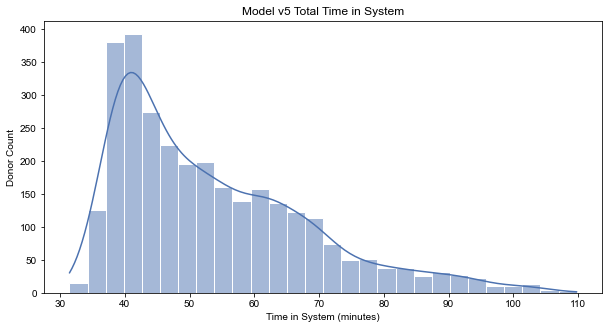

In [11]:
# Initialize the figure and set plot size
ax = plt.subplots(figsize=(10, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(palette="deep", style="whitegrid", rc=custom_params)

#plot total time in system 
sns.histplot(patient_log_df_v5['time_in_system'], kde=True)

#set labels and title
plt.title("Model v5 Total Time in System")
plt.xlabel("Time in System (minutes)")
plt.ylabel("Donor Count");

 - It looks like the majority of donors are out in under 60 minutes. This graph represents all 10 simluations and some of the simualtions that processed more donors had higher wait times potentially skewing our 95% CI.

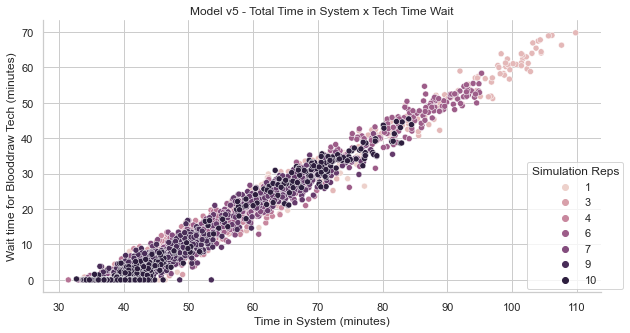

In [12]:
# Initialize the figure and set plot size
ax = plt.subplots(figsize=(10, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(palette="deep", style="whitegrid", rc=custom_params)

# Plot the totaltime against the bd_tech wait time
sns.scatterplot(x="time_in_system", y="wait_for_bd_tech", data=patient_log_df_v5, hue="rep_num")

#set labels and title
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Simulation Reps')
plt.title("Model v5 - Total Time in System x Tech Time Wait")
plt.xlabel("Time in System (minutes)")
plt.ylabel("Wait time for Blooddraw Tech (minutes)");

 - As you can see above the total time in system has a correlation to the wait time for blood technician. Adding another blooddraw tech might decrease these wait times and the overall time in the system.

### Model v6 EDA

For this model we used all the same parameters in Model v5 but increased the blooddraw tech by one. 

In [13]:
#!python ../src/blood_donation_clinic/blood_donation_clinic_model_v6.py --config ../src/blood_donation_clinic/input/basev6_par30g4r2bd11s2.cfg

In [14]:
patient_log_df_v6 = pd.read_csv('../src/blood_donation_clinic/output/consolidated_clinic_patient_log_base_par30g4r2bd11s2.csv')

In [15]:
patient_log_df_v6.describe()

,rep_num,patient_id,arrival_ts,got_greeter_ts,release_greeter_ts,got_reg_ts,release_reg_ts,got_blooddraw_ts,release_bd_tech_ts,got_scheduler_ts,release_scheduler_ts,exit_system_ts,wait_for_greeter,wait_for_reg,wait_for_bd_tech,blooddraw_time,wait_for_scheduler,post_bdd_time,time_in_system
count,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,1493.000000,1493.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,1493.000000,2988.000000,2988.000000
mean,5.448795,150.019411,301.544406,301.553224,303.551505,303.621797,304.616137,308.248861,328.285532,323.815333,325.814437,344.290701,0.008818,0.070292,3.632724,20.036671,0.051704,16.005169,42.746296
std,2.866939,86.476640,172.058191,172.059955,172.052730,172.061197,172.052412,172.486822,172.454103,172.002434,172.000843,172.465160,0.081097,0.289079,4.700389,1.997300,0.232070,1.018644,5.323374
min,1.000000,1.000000,0.107156,0.107156,1.963347,1.963347,2.397401,2.397401,23.030965,23.293557,25.301611,38.454444,0.000000,0.000000,0.000000,13.491033,0.000000,15.001111,31.937218
25%,3.000000,75.000000,151.235675,151.235675,152.958503,153.314579,154.278655,159.938480,179.502120,178.647416,180.643146,195.418327,0.000000,0.000000,0.000000,18.733130,0.000000,15.275347,38.942471
50%,5.000000,150.000000,303.129626,303.129626,305.286395,305.573114,306.352917,311.181092,330.814315,320.826297,322.871284,346.514530,0.000000,0.000000,1.650410,20.027291,0.000000,15.704802,41.593985
75%,8.000000,225.000000,450.029953,450.029953,452.184533,452.184533,452.834982,457.380845,477.478639,472.551556,474.504993,493.697084,0.000000,0.000000,5.972845,21.406319,0.000000,16.376742,45.626006
max,10.000000,309.000000,605.126407,605.126407,607.008823,607.008823,607.670638,614.379398,636.725751,633.336818,635.424361,652.492840,1.558910,3.681817,26.405898,29.214301,2.517350,24.863554,68.570985


In [16]:
patient_log_ci = {'wait_for_greeter': {'n_samples': 10, 'mean_mean': 0.009, 'sd_mean': 0.006, 'ci_95_lower': 0.005, 'ci_95_upper': 0.013}, 
                  'wait_for_reg': {'n_samples': 10, 'mean_mean': 0.071, 'sd_mean': 0.030, 'ci_95_lower': 0.052, 'ci_95_upper': 0.089}, 
                  'wait_for_bd_tech': {'n_samples': 10, 'mean_mean': 3.598, 'sd_mean': 1.800, 'ci_95_lower': 2.482, 'ci_95_upper': 4.714}, 
                  'wait_for_scheduler': {'n_samples': 10, 'mean_mean': 0.052, 'sd_mean': 0.025, 'ci_95_lower': 0.036, 'ci_95_upper': 0.067}, 
                  'time_in_system': {'n_samples': 10, 'mean_mean': 42.710, 'sd_mean': 1.859, 'ci_95_lower': 4.558, 'ci_95_upper': 43.862}}

In [28]:
pd.DataFrame(patient_log_ci)

,wait_for_greeter,wait_for_reg,wait_for_bd_tech,wait_for_scheduler,time_in_system
n_samples,10.000,10.000,10.000,10.000,10.000
mean_mean,0.009,0.071,3.598,0.052,42.710
sd_mean,0.006,0.030,1.800,0.025,1.859
ci_95_lower,0.005,0.052,2.482,0.036,4.558
ci_95_upper,0.013,0.089,4.714,0.067,43.862


By adding one more Blooddraw Technician we were able to decrease the average wait time for about 14 minutes down to less than 4 minutes. 

In [21]:
print(f"95th percentile of time in v5 system: {patient_log_df_v5['time_in_system'].quantile(0.95):.1f} mins")
print(f"95th percentile of time in v6 system: {patient_log_df_v6['time_in_system'].quantile(0.95):.1f} mins")

95th percentile of time in v5 system: 84.1 mins
95th percentile of time in v6 system: 53.0 mins


We were also able to decrease the 95th percentile from 84 minutes down to 53 minutes. 

In [22]:
stats_time_in_system = patient_log_df_v6.groupby(['rep_num'])['time_in_system'].describe()
stats_time_in_system

,count,mean,std,min,25%,50%,75%,max
rep_num,,,,,,,,
1,300.0,42.963029,4.738385,32.962288,39.393265,42.538485,46.032440,61.639492
2,308.0,41.827839,4.478469,33.775960,38.996928,40.764838,44.090287,58.790416
3,308.0,43.593876,6.067255,32.437881,39.372647,42.476351,46.178778,68.570985
4,309.0,45.038477,6.029073,32.777800,40.093787,44.288927,49.502283,67.600349
5,288.0,41.666290,4.894035,32.730875,38.216570,40.535519,44.178045,60.999727
6,308.0,46.591490,6.360255,32.411979,41.640542,46.001022,50.685972,65.189002
7,290.0,40.873336,3.846339,31.937218,38.244700,40.281937,42.851746,55.602572
8,297.0,41.249515,4.522912,32.020361,38.188018,40.356886,42.773112,57.032219
9,289.0,41.382683,3.654651,34.204001,38.533191,40.768587,43.889967,53.730782


We were not able to get close to the 330 donors processed in simulation rep 2 in Model v5 but we do have all reasonable total in system times for all simulation reps.

In [23]:
stats_bd_tech_wait = patient_log_df_v6.groupby(['rep_num'])['wait_for_bd_tech'].describe()
stats_bd_tech_wait

,count,mean,std,min,25%,50%,75%,max
rep_num,,,,,,,,
1,300.0,3.497126,4.001609,0.0,0.000000,2.178009,5.903169,15.165674
2,308.0,2.675091,3.763494,0.0,0.000000,0.840491,4.283181,17.545157
3,308.0,4.426382,5.486749,0.0,0.000000,2.632572,6.535704,24.751441
4,309.0,5.954081,5.598946,0.0,0.000000,5.146967,9.954135,26.405898
5,288.0,2.845254,4.084474,0.0,0.000000,0.568807,4.966096,19.419805
6,308.0,7.390099,6.008324,0.0,2.247119,6.642287,11.767094,21.840228
7,290.0,1.885064,3.009880,0.0,0.000000,0.000000,2.853317,14.391423
8,297.0,2.306492,3.619338,0.0,0.000000,0.462346,2.986433,16.894762
9,289.0,2.267748,2.767835,0.0,0.000000,0.823056,4.204238,10.818403


We were also able to significatly reduce the average wait time for blooddraw technicians. I am not too thrilled with the max blooddraw times but that may be reasonable for client depending on the setup. 

For those wanting to run a donation process on site for employees this may not be acceptable. For walk-in clinics this could be managable. 

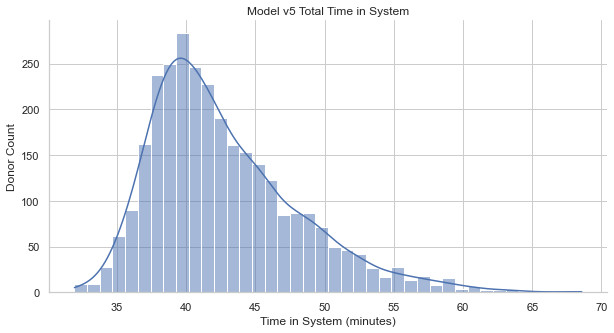

In [24]:
# Initialize the figure and set plot size
ax = plt.subplots(figsize=(10, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(palette="deep", style="whitegrid", rc=custom_params)

#plot total time in system 
sns.histplot(patient_log_df_v6['time_in_system'], kde=True)

#set labels and title
plt.title("Model v5 Total Time in System")
plt.xlabel("Time in System (minutes)")
plt.ylabel("Donor Count");

We are definitely a lot closer to bell curve with the average overall time in system being right around 40 minutes. 

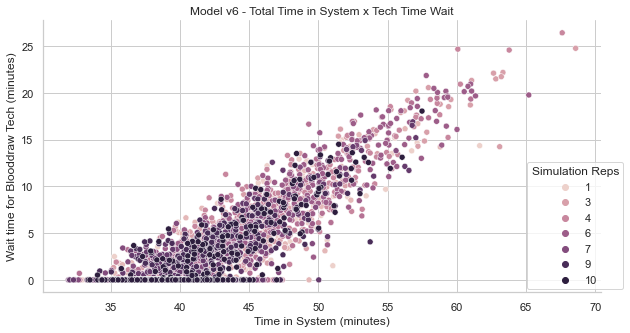

In [25]:
# Initialize the figure and set plot size
ax = plt.subplots(figsize=(10, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(palette="deep", style="whitegrid", rc=custom_params)

# Plot the totaltime against the bd_tech wait time
sns.scatterplot(x="time_in_system", y="wait_for_bd_tech", data=patient_log_df_v6, hue="rep_num")

#set labels and title
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Simulation Reps')
plt.title("Model v6 - Total Time in System x Tech Time Wait")
plt.xlabel("Time in System (minutes)")
plt.ylabel("Wait time for Blooddraw Tech (minutes)");

There still appears to be a coorelation to wait time for blooddraw technicians and total time in system. This is to be expected since this is the longest step within the process.

### Conclusion

One last look at both histograms overlayed. You can see the significant reduction in overall time in system by only adding one more technician.

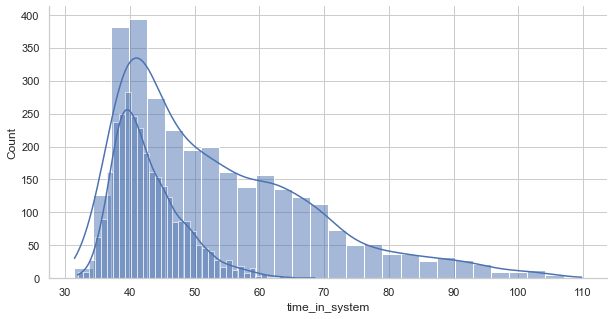

In [27]:
ax = plt.subplots(figsize=(10, 5))
x1 = sns.histplot(patient_log_df_v5['time_in_system'], kde=True)
x2 = sns.histplot(patient_log_df_v6['time_in_system'], kde=True)